In [1]:
# Import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper')

# Hands-On Activity 2.1: Experiment with "Ranomness"

## Theoretical Objectives

+ To develop intuition about the uncertainty of a coin toss experiment.
+ To experiment with the Monte Carlo method for estimating probabilities and develop some intuition about its uncertainty.

## Practical Objectives
+ To experiment with drawing causal graphs within Python.
+ To learn about Python functions and how to properly document them.
+ To learn how to create simple interactive tools within Jupyter notebooks.

As we showed in the "Dynamics of a coin toss" video, the result of a coin toss depends on the initial conditions.
We actually derived the dynamics for an idealized coin toss moving on a vertical plane.
Following the notation of the video, let $X\in\{H,T\}$ be the variable describing the result of the coin toss experiment, $v_0$ be the initial velocity of the coin, and $\omega_0$ the initial angular velocity.
The result of the coin toss is given by the formula:
$$
X = 
\begin{cases}
T,&\;\text{if}\;\frac{2v_0\omega_0}{g} (\text{mod}\;2\pi) \in \left(\frac{\pi}{2},\frac{3\pi}{2}\right),\\
H,&\;\text{otherwise}.
\end{cases}
$$
The corresponding graphical model is:

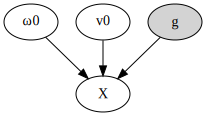

In [2]:
from graphviz import Digraph
gct = Digraph('coin_toss_g')
gct.node('omega0', label='<&omega;<sub>0</sub>>')
gct.node('v0', label='<v<sub>0</sub>>')
gct.node('g', style='filled')
gct.node('X')
gct.edge('g', 'X')
gct.edge('v0', 'X')
gct.edge('omega0', 'X')
gct.render('coin_toss_g', format='png')
gct

A typical human throws the coin with
$$
v_0 \approx 2.5\;\text{m/s},
$$
and
$$
\omega_0 \approx 200\times 2\pi\;\text{rad/s}.
$$
Let us simulate how sensitive is the result on the choice of these parameters.

In [3]:
# Get the acceleration of gravity from the scipy module
from scipy.constants import g 

def X(v0, omega0):
    """
    Returns the result of a coin toss given initial conditions.
    
    Arguments:
        v0     - The initial velocity
        omega0 - The initial angular velocty.
    """
    tmp = (2 * v0 * omega0 / g) % (2. * np.pi) # taking g = 9.8 m/s**2
    if tmp > 0.5 * np.pi and tmp < 1.5 * np.pi:
        return 'T'
    return 'H'

In [4]:
# Try it out here:
v0 = 2.5
omega0 = 200 * 2. * np.pi
print(X(v0, omega0))

H


In [5]:
# Let's do some interactive tests
from ipywidgets import interactive
def print_X(v0, omega0):
    print("X = ", X(v0, omega0))
interactive(print_X, v0=(2., 3., 0.1), omega0=(100*2*np.pi, 1000*2*np.pi, 5))

interactive(children=(FloatSlider(value=2.5, description='v0', max=3.0, min=2.0), FloatSlider(value=3453.31853…

## Questions

+ Play with the interactive tool above moving $v_0$ and $\omega_0$ changing the result of the coin toss experiment. To which of the two parameters is the result of the coin toss most sensitive? 

+ Consider a coin tossing experiment in the moon. Would it be easier or harder to manipulate the result? Hint: Look up the acceleration of gravity for the moon, and change the value of ``g`` in the defintion of the function ``X``. 

As we discussed, the uncertainty rises from our inability to perfectly control the initial conditions of the coin toss experiment.
Let us suppose that a typical human throws the coin with an initial velocity:
$$
v_0 = 2.5 \pm 0.2\;\text{m/s},
$$
and an initial angular velocity of
$$
\omega_0 = 400\pi \pm 50\;\text{rad/s}.
$$
For the time being let's interpret the $\pm$ as if it means that all values plus or minus that value are equally likely.

Let us now assume that the experiment is repeated 1,000 times and that each time the initial conditions are drawn randomly.
Then we are going to count the number of times we get an H.
Dividing by the total number of random experiments, we will get the frequency of H's.
The code is given below.

In [6]:
def measure_freq_of_H(v_0_lower=2.3, v_0_upper=2.7, 
                      omega_0_lower=400*np.pi-50, 
                      omega_0_upper=400*np.pi+50,
                      N=10000):
    """
    Repeats an coin toss experiment a given number of times and returns the frequency of heads.
    
    Arguments:
        v_0_lower        -   Lower bound for initial velocity (default = 2.3 m / s)
        v_0_upper        -   Upper bound for initial velocity (default = 2.7 m / s)
        omega_0_lower    -   Lower bound for initial angular velocity 
                             (default = 400 * pi - 50 rad / s)
        omega_0_upper    -   Upper bound for initial angular velocity 
                             (default = 400 * pi + 50 rad / s)
        N                -   The number of experiments to simulate (default = 10000)
    """
    # Counts the number of H's
    num_Hs = 0
    for n in range(N):
        # Randomly generate initial velocity
        v_0 = np.random.rand() * (v_0_upper - v_0_lower) + v_0_lower
        # Randomly generate initial angular velocity
        omega_0 = np.random.rand() * (omega_0_upper - omega_0_lower) + omega_0_lower
        # Add to the counter only if the result is an H
        num_Hs += 1 if X(v_0, omega_0) == 'H' else 0
    return num_Hs / N

Let us run this code:

In [7]:
measure_freq_of_H(N=100)

0.54

This is our first Monte Carlo simulation. As we will see in a few lectures, the empirical frequency that we measure this way converges to the probability of the coin turning out heads in the limit of $N\rightarrow\infty$.
This is known as the *law of large numbers* and we will learn about it in Lecture 8.

## Questions

+ Run ``measure_freq_of_H()`` two or three times. What do you observe? 
+ In the previous question, you observed a form of epistemic uncertainty on the value of the frequency that stems from the fact you are using too few samples to estimate it. Increase the number of experiments $N$ until you frequency of H's starts to converge. We will learn about this uncertainty and how to dies of as you increase $N$ when we talk about the "Central limit theorem" in Lecture 10.